In [1]:
!pip install transformers pillow

In [2]:
!pip install flash_attn einops timm

In [3]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
import copy
%matplotlib inline

In [4]:
model_id="microsoft/Florence-2-large"
model=AutoModelForCausalLM.from_pretrained(model_id,trust_remote_code=True).eval()
processor=AutoProcessor.from_pretrained(model_id,trust_remote_code=True)

In [5]:
# def run_example(task_prompt,text_input=None):
#   if text_input is None:
#     prompt=task_prompt
#   else:
#     prompt = task_prompt + text_input
#   inputs = processor(text=prompt,images=image,return_tensors="pt")
#   generated_ids=model.generate(
#       input_ids=inputs["input_ids"],
#       pixel_value=inputs['pixel_values'],
#       max_new_tokens=1024,
#       early_stopping=False,
#       do_sample=False,
#       num_beams=3,
#   )

#   generated_text=processor.batch_decode(generated_ids,skip_special_tokens=False)[0]
#   parsed_answer=processor.post_process_generation(
#       generated_text,
#       task=task_prompt,
#       image_size=(image.width,image.height)
#   )

#   return parsed_answer

In [6]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=1024,
      num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.width, image.height))

    return parsed_answer


In [10]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image=Image.open(requests.get(url,stream=True).raw)

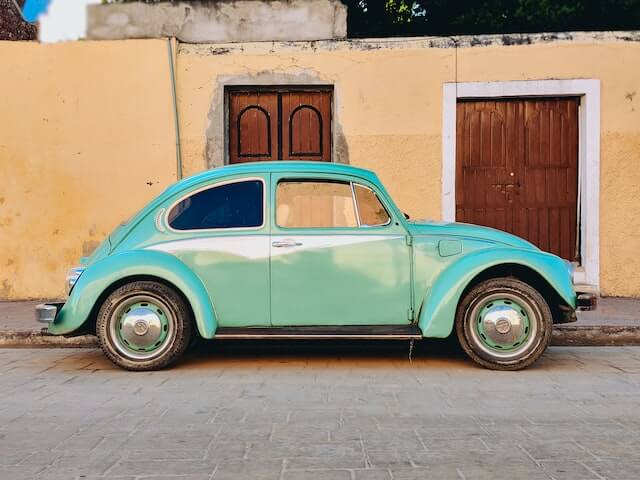

In [11]:
image

In [12]:
task_prompt="<CAPTION>"
run_example(task_prompt)

{'<CAPTION>': '\nA green car parked in front of a yellow building.\n'}

In [13]:
task_prompt="<DETAILED_CAPTION>"
run_example(task_prompt)

{'<DETAILED_CAPTION>': '\nThe image shows a blue Volkswagen Beetle parked in front of a yellow building with two brown doors, surrounded by trees and a clear blue sky.\n'}

In [14]:
task_prompt="<MORE_DETAILED_CAPTION>"
run_example(task_prompt)

{'<MORE_DETAILED_CAPTION>': '\nThe image shows a vintage Volkswagen Beetle car parked on a cobblestone street in front of a yellow building with two wooden doors. The car is painted in a bright turquoise color and has a white stripe running along the side. It has two doors on either side of the car, one on top of the other, and a small window on the front. The building appears to be old and dilapidated, with peeling paint and crumbling walls. The sky is blue and there are trees in the background.\n'}

In [17]:
task_prompt = "<CAPTION_TO_PHRASE_GROUNDING>"
results = run_example(task_prompt, text_input="A green car parked in front of a yellow building.")

In [18]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[34.880001068115234,
    158.63999938964844,
    583.3599853515625,
    374.6399841308594],
   [0.3199999928474426,
    4.079999923706055,
    639.0399780273438,
    305.03997802734375]],
  'labels': ['A green car', 'a yellow building']}}

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import requests
from io import BytesIO

def plot_bounding_boxes_on_image(image, results):
    # Plot the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)

    # Extract bounding boxes and labels from results
    bboxes = results['<CAPTION_TO_PHRASE_GROUNDING>']['bboxes']
    labels = results['<CAPTION_TO_PHRASE_GROUNDING>']['labels']

    # Draw rectangles and labels on the image
    ax = plt.gca()
    for bbox, label in zip(bboxes, labels):
        xmin, ymin, xmax, ymax = bbox
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 10, label, fontsize=12, color='r', weight='bold')

    # Show plot
    plt.axis('off')  # Turn off axis
    plt.show()

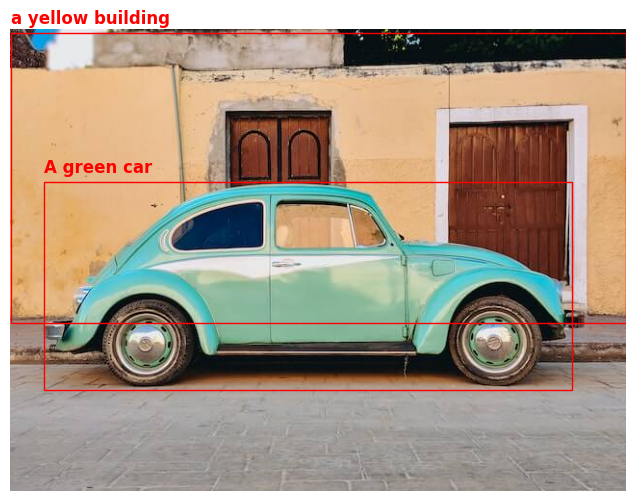

In [22]:
plot_bounding_boxes_on_image(image, results)

In [23]:
task_prompt="<OD>"
results2=run_example(task_prompt)

In [25]:
def plot_bounding_boxes_on_image_OD(image, results):
    # Plot the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)

    # Extract bounding boxes and labels from results
    bboxes = results['<OD>']['bboxes']
    labels = results['<OD>']['labels']

    # Draw rectangles and labels on the image
    ax = plt.gca()
    for bbox, label in zip(bboxes, labels):
        xmin, ymin, xmax, ymax = bbox
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 10, label, fontsize=12, color='r', weight='bold')

    # Show plot
    plt.axis('off')  # Turn off axis
    plt.show()

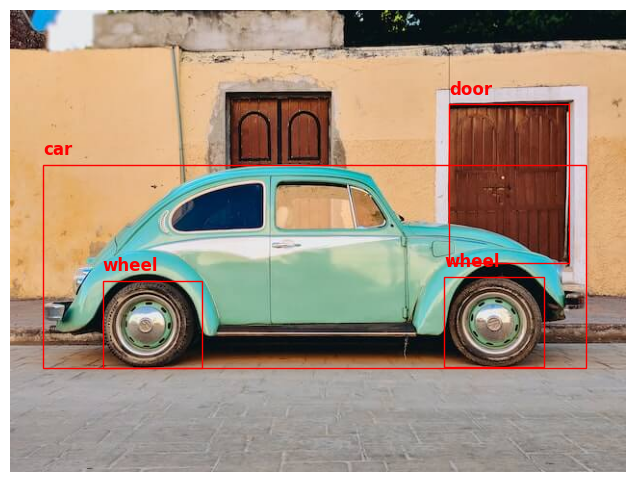

In [26]:
plot_bounding_boxes_on_image_OD(image, results2)

In [27]:
task_prompt="<DENSE_REGION_CAPTION>"
results=run_example(task_prompt)
print(results)

{'<DENSE_REGION_CAPTION>': {'bboxes': [[33.599998474121094, 160.0800018310547, 596.7999877929688, 371.7599792480469], [450.8800048828125, 276.7200012207031, 553.2799682617188, 370.79998779296875], [95.04000091552734, 280.55999755859375, 197.44000244140625, 371.2799987792969]], 'labels': ['turquoise Volkswagen Beetle', 'wheel', 'wheel']}}


In [29]:
def plot_bounding_boxes_on_image_DENSE_REGION_CAPTION(image, results):
    # Plot the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)

    # Extract bounding boxes and labels from results
    bboxes = results['<DENSE_REGION_CAPTION>']['bboxes']
    labels = results['<DENSE_REGION_CAPTION>']['labels']

    # Draw rectangles and labels on the image
    ax = plt.gca()
    for bbox, label in zip(bboxes, labels):
        xmin, ymin, xmax, ymax = bbox
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 10, label, fontsize=12, color='r', weight='bold')

    # Show plot
    plt.axis('off')  # Turn off axis
    plt.show()

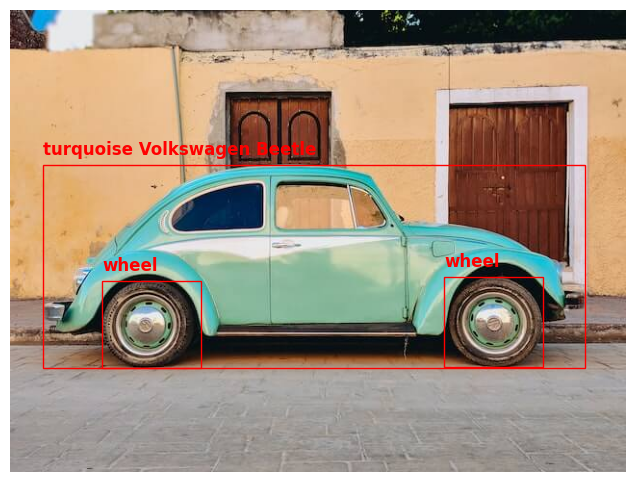

In [30]:
plot_bounding_boxes_on_image_DENSE_REGION_CAPTION(image,results)

In [31]:
task_prompt = "<REGION_PROPOSAL>"
results=run_example(task_prompt)

In [32]:
def plot_bounding_boxes_on_image_REGION_PROPOSAL(image, results):
    # Plot the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)

    # Extract bounding boxes and labels from results
    bboxes = results['<REGION_PROPOSAL>']['bboxes']
    labels = results['<REGION_PROPOSAL>']['labels']

    # Draw rectangles and labels on the image
    ax = plt.gca()
    for bbox, label in zip(bboxes, labels):
        xmin, ymin, xmax, ymax = bbox
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 10, label, fontsize=12, color='r', weight='bold')

    # Show plot
    plt.axis('off')  # Turn off axis
    plt.show()

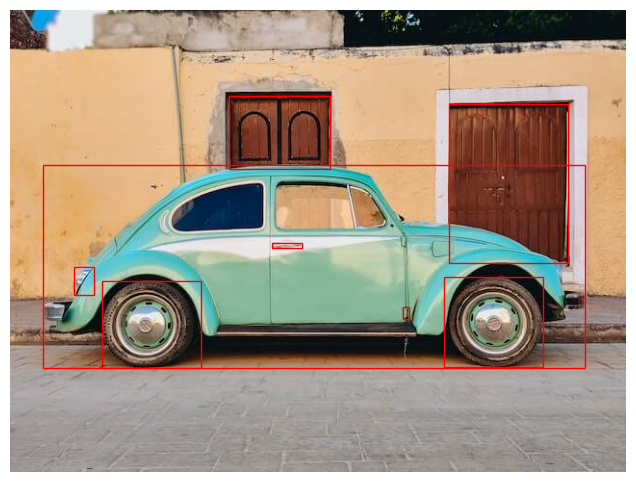

In [33]:
plot_bounding_boxes_on_image_REGION_PROPOSAL(image,results)

In [38]:
url = "https://global.discourse-cdn.com/uipath/original/4X/7/2/c/72c6e68215208ca6444071e881ca9dfe8c5ffafb.jpeg"
image=Image.open(requests.get(url,stream=True).raw)

In [39]:
task_prompt = "<OCR>"
results=run_example(task_prompt)

In [40]:
results

{'<OCR>': '\nभारत्य साविसरGOVERNMENT OF INDIVA-नाम / Name:Adarsh kumarजनम तायेख / DOB: 17/06/1995पुर्े॥प/ Male09523764258आध्ागर - आदमी का अपकीर\n'}